<a href="https://colab.research.google.com/github/John-p-v1999/basic_kmeans/blob/master/basic_kmeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
np.random.seed(42)
import matplotlib.pyplot as plt


In [ ]:
def euclidean_dist(x1,x2):
  return np.sqrt(np.sum((x1-x2)**2))

In [ ]:
class KMeans:
  def __init__(self,K=3,max_iters=100,plot_steps=False):
    self.K=K
    self.max_iters=max_iters
    self.plot_steps=plot_steps

    self.clusters = [[] for _ in range(self.K)]
    self.centroids=[]

  def predict(self,X):
    self.X=X
    self.n_samples, self.n_features= X.shape #unsupervised
    #initialising the centroid
    random_indices= np.random.choice(self.n_samples,self.K,replace=False)
    self.centroids=[self.X[index] for index in random_indices] 
    for _ in range(self.max_iters):
      self.clusters=self._create_clusters()
      if self.plot_steps:
        self.plot()
      centroids_old=self.centroids # to check for convergence later
      self.centroids=self._get_centroids()
      if self.plot_steps:
        self.plot()
      if self._is_converged(centroids_old):
        break
    return self._get_cluster_labels()



  def _create_clusters(self):
    clusters= [[] for _ in range(self.K)]
    for idx,sample in enumerate(self.X):
      closest_centroid=self._closest_centroid(sample)
      clusters[closest_centroid].append(idx)
    return clusters
  def _closest_centroid(self,sample):
    dist=[euclidean_dist(sample,point) for point in self.centroids]
    return np.argmin(dist)
  def _get_centroids(self):
    centroid=np.zeros((self.K, self.n_features))
    for idx,ele in enumerate(self.clusters):
      cluster_mean=np.mean(self.X[ele], axis=0)
      centroid[idx]=cluster_mean
    return centroid

  def _is_converged(self,centroids_old):
    distance=[euclidean_dist(centroids_old[i],self.centroids[i]) for i in range(self.K)]
    return sum(distance) == 0
  def _get_cluster_labels(self):
    labels=np.empty(self.n_samples)
    for idx,cluster in enumerate(self.clusters):
      for s_idx in cluster:
        labels[s_idx] = idx
    return labels
  def plot(self):
    fig,ax=plt.subplots(figsize=(15,9))
    for i, index in enumerate(self.clusters):
      point=self.X[index].T
      ax.scatter(*point )
    for point in self.centroids:
      ax.scatter(*point, marker="x",color="black",linewidth=2)
    plt.show()

       

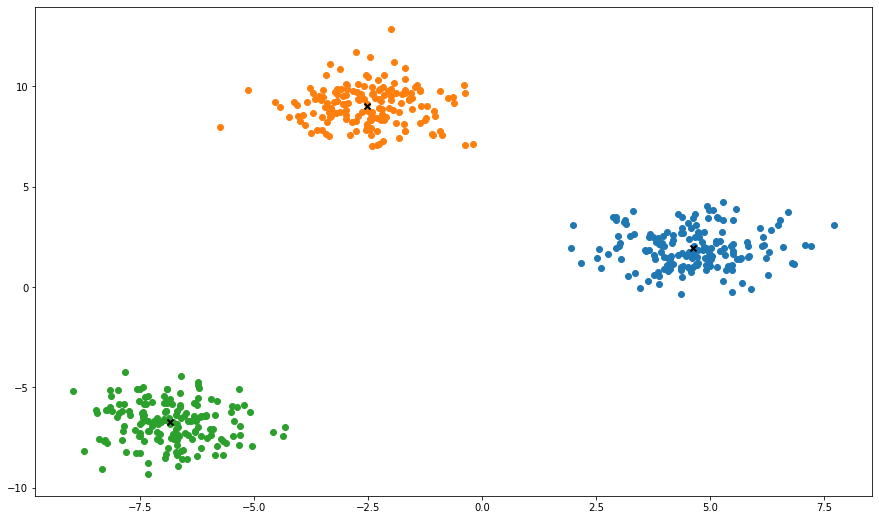

In [ ]:
from sklearn.datasets import make_blobs
X,y = make_blobs(centers=3, n_samples=500, n_features=2, shuffle=True, random_state=42)
clusters = len(np.unique(y))
k=KMeans(K=clusters, max_iters=150, plot_steps=False)
y_pred=k.predict(X)
k.plot()

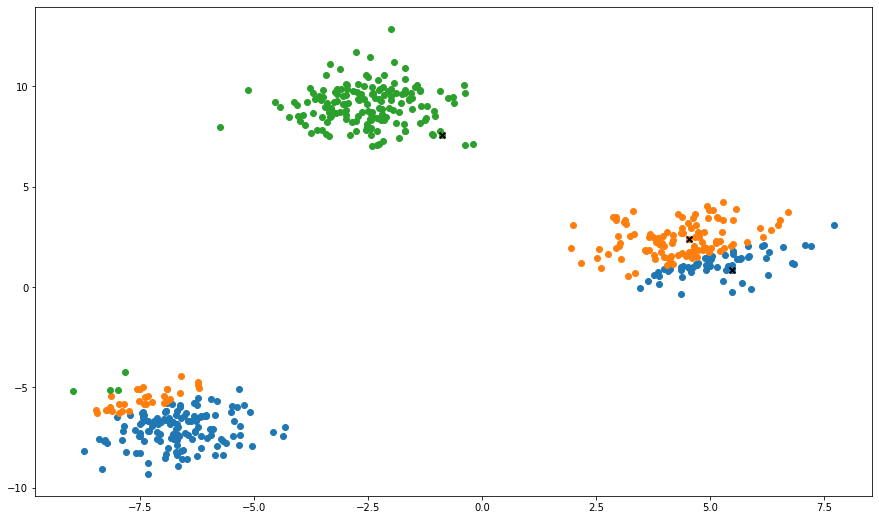

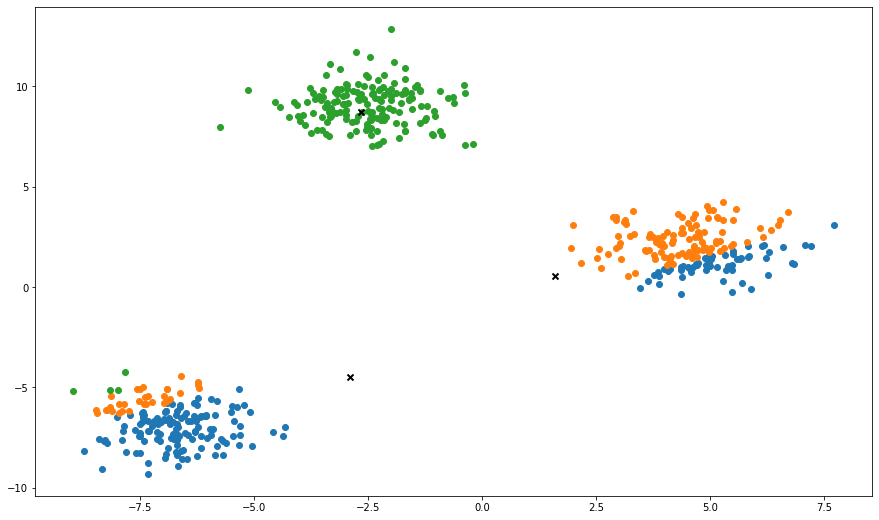

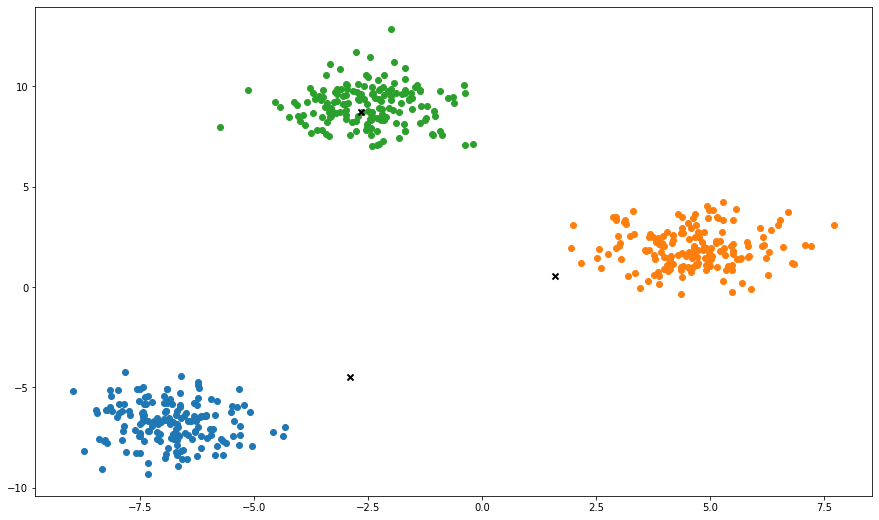

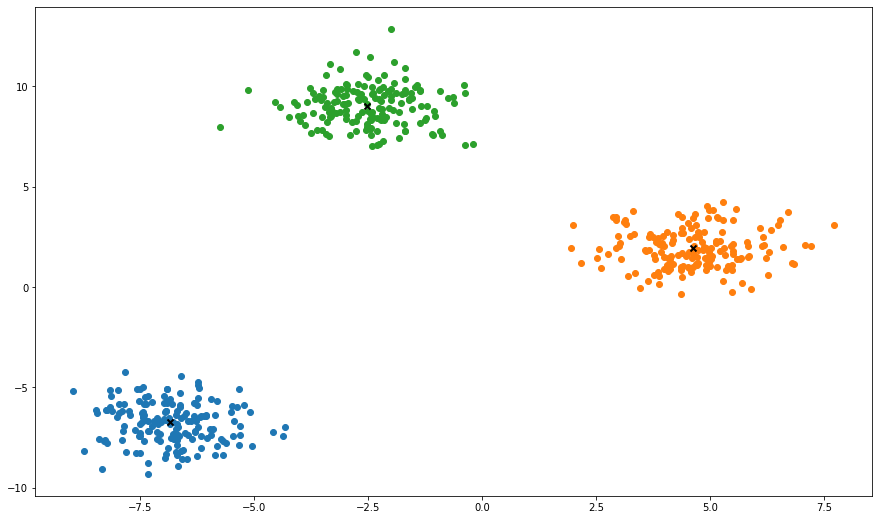

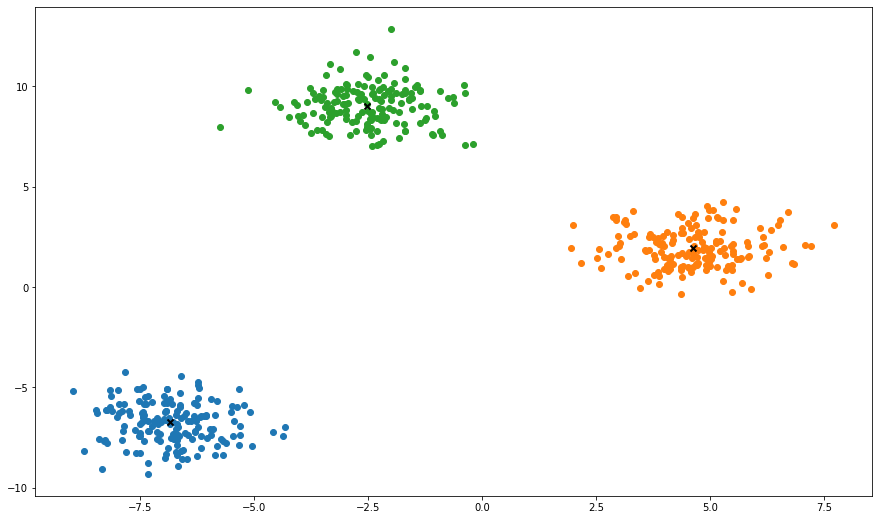

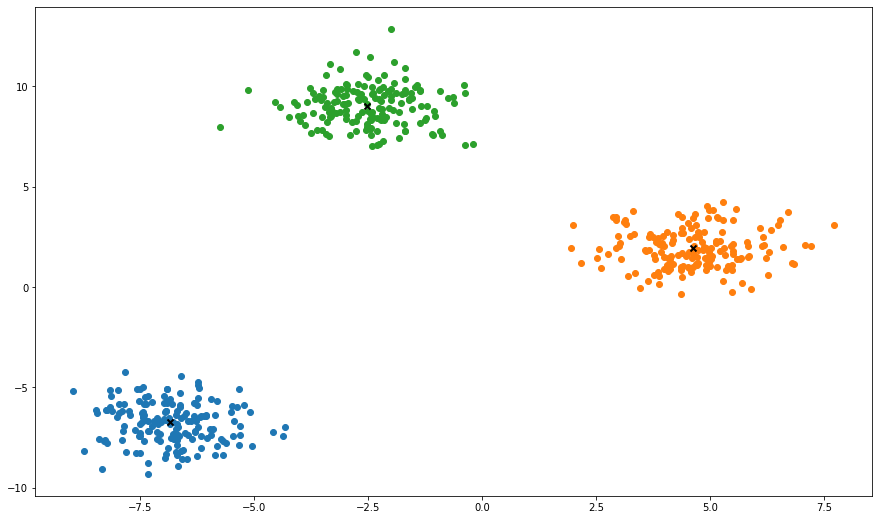

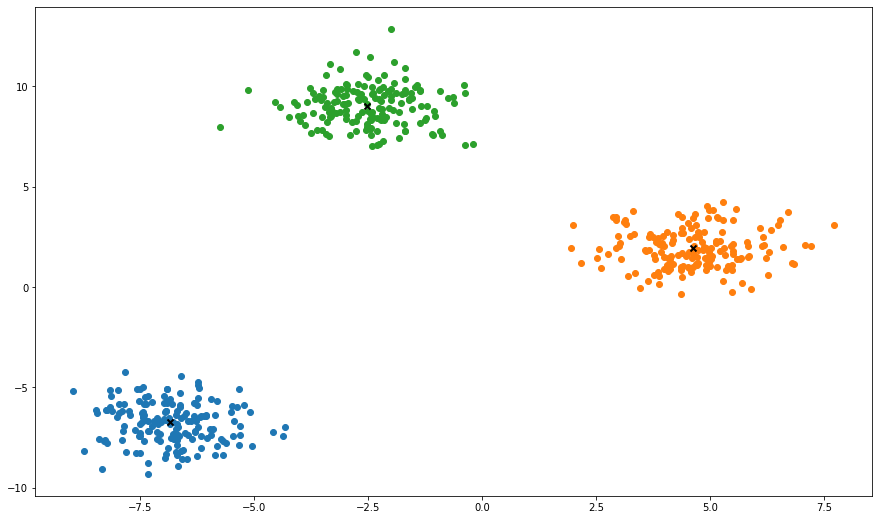

In [ ]:
from sklearn.datasets import make_blobs
X,y = make_blobs(centers=3, n_samples=500, n_features=2, shuffle=True, random_state=42)
clusters = len(np.unique(y))
k=KMeans(K=clusters, max_iters=150, plot_steps=True)
y_pred=k.predict(X)
k.plot()